In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

churn_data = pd.read_csv('churn.csv')

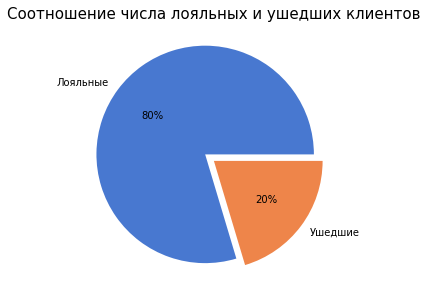

In [4]:
#9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
grouped_by_exit = churn_data.groupby(['Exited'])['RowNumber'].count()

labels = ['Лояльные', 'Ушедшие']
colors = sns.color_palette('muted')[0:5]

plt.figure(figsize=(5,5), facecolor='white')
plt.title('Соотношение числа лояльных и ушедших клиентов', size = 15)
plt.pie(grouped_by_exit, explode = [0.1, 0], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Из полученных данных можно сделать вывод, что один клиент из пяти прекращает сотрудничать с банком.

In [2]:
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

filtered_by_balance = churn_data[churn_data['Balance'] > 2500]
fig = px.histogram(
    data_frame = filtered_by_balance,
    x='Balance',
    height=300,
    width=700,
    title='Распределение баланса клиентов с остатками на счетах более 2500$'
)
fig.write_image('9.2.png')
#fig.show()

![title](9.2.png)

Наибольшее число клиентов банка имеют остатки на счетах между 100 и 150 тыс.долл. Количество счетов с остатками более 200 тыс.долл или менее 10 тыс.долл очень мало.

In [3]:
#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

fig = px.histogram(
    data_frame = churn_data,
    x='Balance',
    color='Exited',
    height=500,
    width=700,
    title='Распределение баланса в зависимости от лояльности клиентов'
)
fig.write_image('9.3.png')
#fig.show()

![title](9.3.png)

В среднем баланс на счетах ушедших клиентов значительно меньше, чем у лояльных. Также можно отметить большой выброс количества как лояльных, так и ушедших клиентов с нулевым балансом. Ушедшим клиентам могли не понравиться предложения банка, качество сервиса.

In [4]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

fig = px.box(
    data_frame=churn_data,
    x = 'Age',
    color = 'Exited',
    height=300,
    width=700,
    title='Распределение возраста клиентов по группам',
)
fig.write_image('9.4.png')
#fig.show()

![title](9.4.png)

Потенциальных выбросов больше у лояльных клиентов, это значит, что почти все возрастные клиенты, которых немного на общем фоне, остаются с банком. На них и стоит обратить внимание.

In [5]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

fig = px.scatter(
    data_frame=churn_data,
    x = 'EstimatedSalary',
    y = 'CreditScore',
    color='Exited',
    height=500,
    width=800,
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', 
)
fig.write_image('9.5.png')
#fig.show()

![title](9.5.png)

Точки разбросаны хаотично и сделать никаких выводов на основе графика нельзя.

In [6]:
#9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

bar_data = churn_data.groupby(['Gender'], as_index=False).mean()
fig = px.bar(
    data_frame=bar_data,
    x='Gender',
    y='Exited',
    height=300,
    width=700,
    title='Соотношение ушедших мужчин и женщин'
)
fig.write_image('9.6.png')
#fig.show()

![title](9.6.png)

Чаще уходят женщины.

In [7]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

bar_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
fig = px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='RowNumber',
    color='Exited',
    barmode='group',
    height=300,
    width=800,
    title='Соотношение ушедших и лольяных клиентов в зависимости от числа услуг'
)
fig.write_image('9.7.png')
#fig.show()


![title](9.7.png)

С увеличением числа приобретённых услуг, количество ушедших клиентов снижается.

In [8]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

bar_data = churn_data.groupby(['IsActiveMember', 'Exited'], as_index=False).count()
fig = px.bar(
    data_frame=bar_data,
    x='IsActiveMember',
    y='RowNumber',
    color='Exited',
    barmode='group',
    height=300,
    width=900,
    title='Соотношение ушедших и лольяных клиентов в зависимости от активного статуса клиента'
)
fig.write_image('9.8.png')
#fig.show()

![title](9.8.png)

Ушедших клиентов с активным статусом меньше, чем ушедших клиентов без активного статуса. Чтобы уменьшить отток клиентов среди неактивных клиентов нужно больше взаимодействовать с ними, проводить опросы. Также можно предложить различного рода акции и стимулы. 

In [9]:
#9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

chor_data = churn_data.groupby(['Geography'], as_index=False).mean()
fig = px.choropleth(
    data_frame=chor_data,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    hover_name='Geography',
    color_continuous_scale='Reds',
    height=500,
    width=700,
    title='Отток клиентов на карте мира',
)
fig.write_image('9.9.png')
#fig.show()

![title](9.9.png)

Доля ушедших клиентов больше в Германии. Это может быть связано с более привлекательными предложения конкурентов в данной стране.

In [ ]:
#9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"